In [9]:
import warnings 
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import matplotlib.pyplot as plt
import os
import glob
from os.path import expanduser
import datetime
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.patches as mpatches
from TUG_classes import *
from report_creation import *


## Dati anagrafici 

In [10]:
today_date = datetime.today().strftime("%d %b %Y")
saveFigReport = True

In [95]:
#load file 
home = expanduser("~")
subj = 5
trial = 3
data_path = 'etapas-results/motion-analysis'
#data_path = 'experimentData/subj_' + str(subj) + '/tr_' + str(trial)  
pth = os.path.join(home,data_path)

lastfile = os.path.join(pth,'user-#3a-tug-0.mat')

In [96]:
data = []
data.append(loadmat(lastfile))

In [97]:
data

[{'__header__': b'MATLAB 5.0 MAT-file, Platform: x86_64-pc-linux-gnu, Created by: libmatio v1.5.21 on Thu Apr 13 16:28:17 2023',
  '__version__': '1.0',
  '__globals__': [],
  'Time_samples': array([123.08868575, 123.18849349, 123.28613377, 123.38545465,
         123.48536086, 123.58597922, 123.6860559 , 123.78832269,
         123.88586974, 123.98667789, 124.08641672, 124.18655109,
         124.28918099, 124.39025664, 124.48627567, 124.58650112,
         124.68627286, 124.78683019, 124.88652492, 124.98672938,
         125.09117079, 125.1886394 , 125.28907156, 125.39079762,
         125.4884634 , 125.58837414, 125.68763828, 125.78700566,
         125.88744259, 125.98747921, 126.08826923, 126.18944287,
         126.28933311, 126.38800573, 126.48825216, 126.58860278,
         126.68833184, 126.78777003, 126.88917232, 126.99006319,
         127.09056592, 127.18932629, 127.29150391, 127.39110446,
         127.48948622, 127.59022141, 127.68964982, 127.78824568,
         127.8892355 , 127.988

In [98]:
time = []

for i in range(len(data)):

    datai = data[i]
    time.append(datai['Time_samples'])
    shoulderCenter = datai['Keypoints']['shoulderCenter']
    head = datai['Keypoints']['head']
    shoulderLeft = datai['Keypoints']['shoulderLeft']
    shoulderRight = datai['Keypoints']['shoulderRight']
    elbowLeft = datai['Keypoints']['elbowLeft']
    handLeft = datai['Keypoints']['handLeft']
    elbowRight = datai['Keypoints']['elbowRight']
    handRight = datai['Keypoints']['handRight']
    hipLeft = datai['Keypoints']['hipLeft']
    hipRight = datai['Keypoints']['hipRight']
    ankleLeft = datai['Keypoints']['ankleLeft']
    ankleRight = datai['Keypoints']['ankleRight']
    kneeLeft = datai['Keypoints']['kneeLeft']
    kneeRight = datai['Keypoints']['kneeRight']
    footLeft = datai['Keypoints']['footLeft']
    footRight = datai['Keypoints']['footRight']
    hipCenter = datai['Keypoints']['hipCenter']

    key_pam = {
        "shoulderCenter" : shoulderCenter,
        "head" : head,
        "shoulderLeft" : shoulderLeft,
        "shoulderRight" : shoulderRight,
        "elbowLeft" : elbowLeft,
        "handLeft" : handLeft,
        "elbowRight" : elbowRight,
        "handRight" : handRight,
        "hipLeft" : hipLeft,
        "hipRight" : hipRight,
        "ankleLeft" : ankleLeft,
        "ankleRight" : ankleRight,
        "kneeLeft" : kneeLeft,
        "kneeRight" : kneeRight,
        "footLeft" : footLeft,
        "footRight" : footRight,
        "hipCenter" : hipCenter
    }
    s=Skeleton(key_pam)

    samp2cut= 49
    in_stand_idx, in_wf_idx, fin_wf_idx, fin_turn1_idx, fin_wb_idx, fin_turn2_idx, fin_sit_idx = compute_timing(s, samp2cut)

    allmet = datai["Exercise"]["metrics"]
    #flt = allmet['step_0']["median_filter_window"]
    flt = 4
    proj = True
    tstanding = time[0][in_stand_idx]
    tforward = time[0][in_wf_idx]
    tturning1 = time[0][fin_wf_idx]
    tbackward = time[0][fin_turn1_idx]
    tturning2 = time[0][fin_wb_idx]
    tsitting = time[0][fin_turn2_idx]
    tend = time[0][fin_sit_idx]
    step_thresh = 0.25 #minimum distance between ankles to identify a step
    durata = samp2cut #amount of samples to identify resting phase TODO:change variable name
    step = Step(flt, proj, tstanding, tforward, tturning1, tbackward, tturning2, tsitting, tend, step_thresh, durata)
    step.compute(s, subj, trial, pth)
    stepmet = [step.step_distance, step.nsteps, step.cadence, step.speed, step.speed_z, step.walking_time, step.ex_time,
                step.filtered_step_distance, step.strikes, step.step_width, step.step_length]

table_tug = pd.DataFrame([['Normale mobilità'],['Buona mobilita'],['Ausili cammino'],['Rischio caduta']],
            index=['< 10 s','< 20 s','< 30 s','>= 30 s'],
            columns=['Tabella TUG'])
display(table_tug)

time_score = tend-tstanding
print("Il test è stato svolto in",round(time_score,2),"s")
if time_score < 10:
    evaluation = 'Normale mobilità'
    print("La valutazione è [1;30;42m",evaluation)
elif time_score < 20:
    evaluation = 'Buona mobilità, non necessita ausili'
    print("La valutazione è [1;30;42m",evaluation)
elif time_score < 30:
    evaluation = 'Necessita ausili cammino'
    print("La valutazione è [1;30;43m",evaluation)
elif time_score >= 30:
    evaluation = 'Rischio caduta'
    print("La valutazione è [1;30;41m",evaluation)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [99]:
print(time[0][in_stand_idx])
print(time[0][in_wf_idx])
print(time[0][fin_wf_idx])
print(time[0][fin_turn1_idx])
print(time[0][fin_wb_idx])
print(time[0][fin_turn2_idx])
print(time[0][fin_sit_idx])



NameError: name 'in_stand_idx' is not defined

[Text(0.5, 0, 'Time [s]'), Text(0, 0.5, 'Shoulder/hip center (z-dim) [m]')]

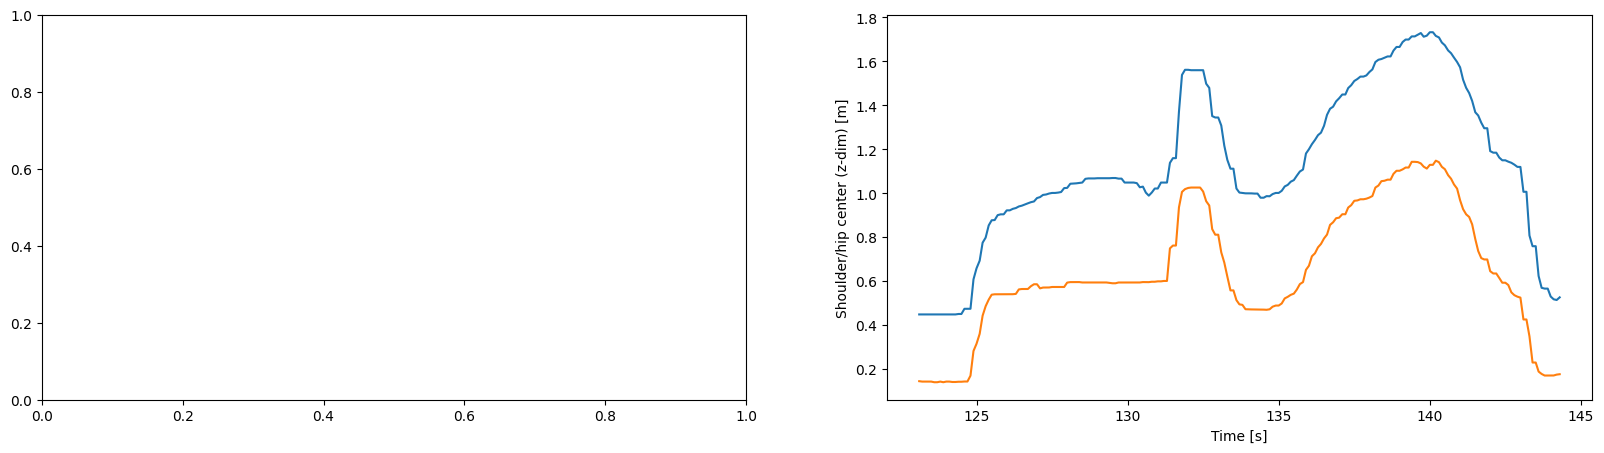

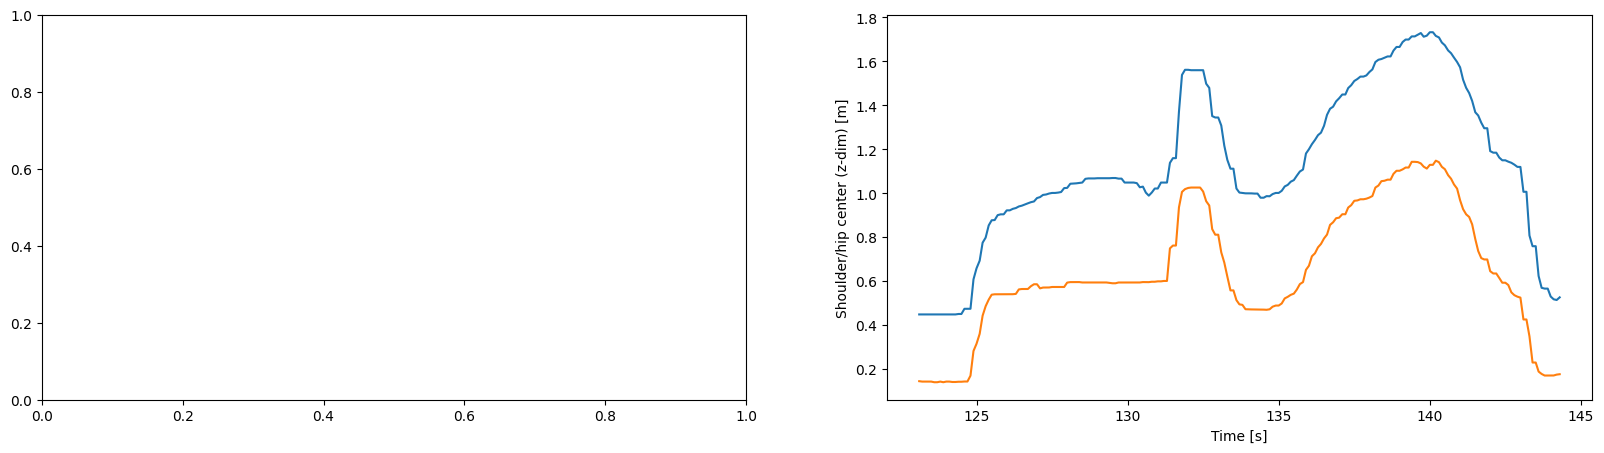

In [100]:
fig, axs = plt.subplots(1,2,figsize=(20, 5))
# fig.suptitle('TUG test')
# axs[0].plot(time[0][0:-1], shoulderCenter[:,1], label ='ShoulderCenter')
# axs[0].plot(time[0][0:-1], hipCenter[:,1], label ='HipCenter')
# axs[0].legend()

axs[1].plot(time[0][0:-1], shoulderCenter[:,2], label ='ShoulderCenter')
axs[1].plot(time[0][0:-1], hipCenter[:,2], label ='HipCenter')
axs[1].set(xlabel='Time [s]', ylabel='Shoulder/hip center (z-dim) [m]')

fig2, axs2 = plt.subplots(1,2,figsize=(20, 5))
# fig.suptitle('TUG test')
# axs[0].plot(time[0][0:-1], shoulderCenter[:,1], label ='ShoulderCenter')
# axs[0].plot(time[0][0:-1], hipCenter[:,1], label ='HipCenter')
# axs[0].legend()

axs2[1].plot(time[0][0:-1], shoulderCenter[:,2], label ='ShoulderCenter')
axs2[1].plot(time[0][0:-1], hipCenter[:,2], label ='HipCenter')
axs2[1].set(xlabel='Time [s]', ylabel='Shoulder/hip center (z-dim) [m]')

# axs[1].plot(time[0][0:-1], shoulderLeft[:,2], label ='shoulderLeft')
# axs[1].set(xlabel='Time [s]', ylabel='shoulderLeft/hip center (z-dim) [m]')

# axs[1].plot(time[0][0:-1], shoulderLeft[:,2]-ankleLeft[:,2], label ='ankleLeft')
# axs[1].set(xlabel='Time [s]', ylabel='Ankle/hip center (z-dim) [m]')

# axs[1].plot(time[0][0:-1], ankleLeft[:,2], label ='ankleLeft')
# axs[1].set(xlabel='Time [s]', ylabel='Ankle/hip center (z-dim) [m]')

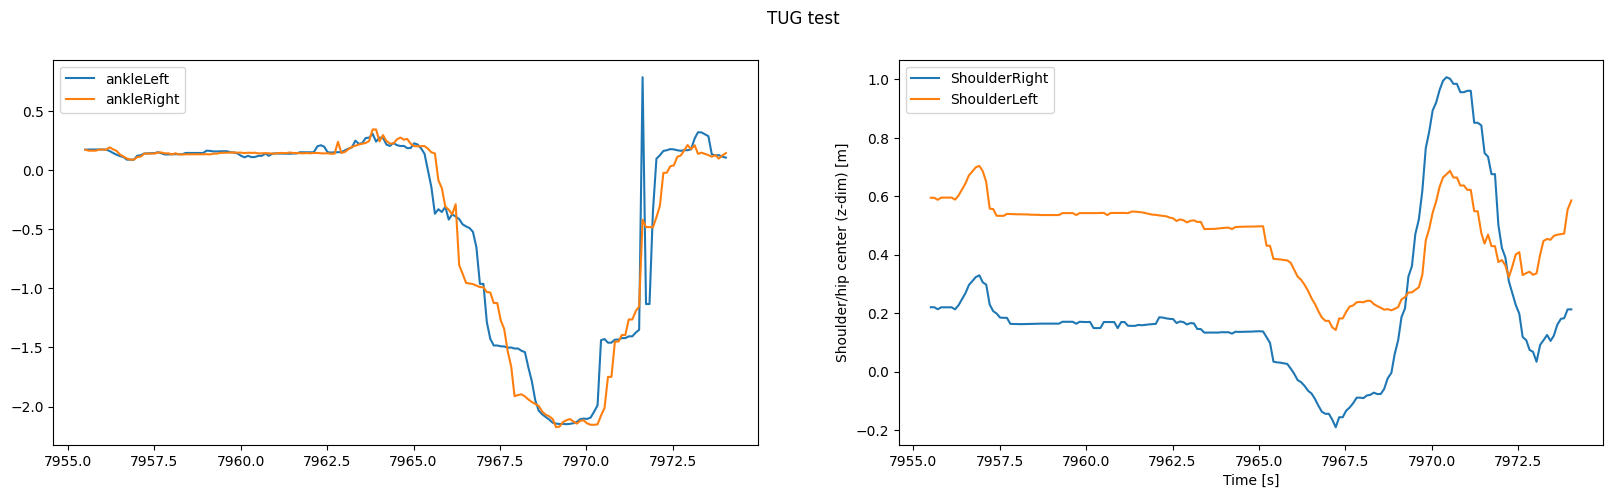

In [28]:
fig, axs = plt.subplots(1,2,figsize=(20, 5))
fig.suptitle('TUG test')
axs[0].plot(time[0][0:-1], ankleLeft[:,1], label ='ankleLeft')
axs[0].plot(time[0][0:-1], ankleRight[:,1], label ='ankleRight')
axs[0].legend()

	
axs[1].plot(time[0][0:-1], shoulderRight[:,0], label ='ShoulderRight')
axs[1].plot(time[0][0:-1], shoulderLeft[:,0], label ='ShoulderLeft')
axs[1].set(xlabel='Time [s]', ylabel='Shoulder/hip center (z-dim) [m]')
axs[1].legend()

NameError: name 'tstanding' is not defined

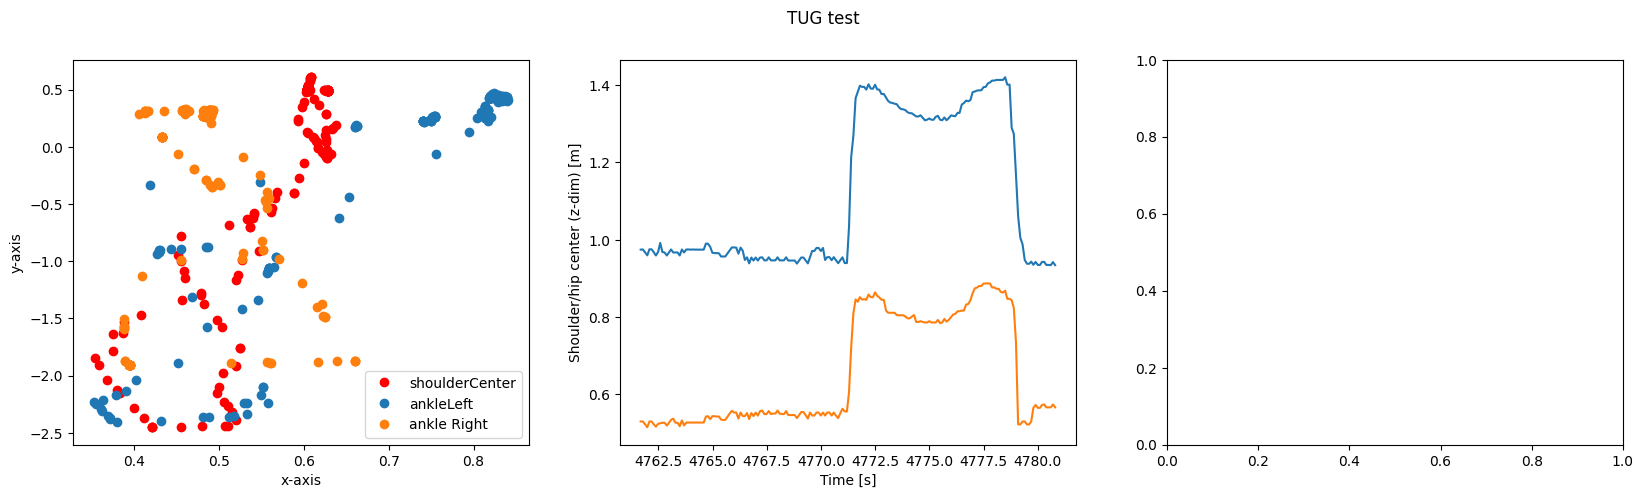

In [10]:
fig, axs = plt.subplots(1,3,figsize=(20, 5))
fig.suptitle('TUG test')
axs[0].plot(shoulderCenter[:,0], shoulderCenter[:,1],'ro',label= 'shoulderCenter')
axs[0].plot(ankleLeft[:,0], ankleLeft[:,1],'o',label= 'ankleLeft')
axs[0].plot(ankleRight[:,0], ankleRight[:,1],'o',label= 'ankle Right')
axs[0].set(xlabel='x-axis', ylabel='y-axis')
axs[0].legend()

	
axs[1].plot(time[0][0:-1], shoulderCenter[:,2], label ='ShoulderCenter')
axs[1].plot(time[0][0:-1], hipCenter[:,2], label ='HipCenter')
axs[1].set(xlabel='Time [s]', ylabel='Shoulder/hip center (z-dim) [m]')
bottom_point= 0.5
height_val = 1
left, bottom, width, height = (tstanding, bottom_point, tforward-tstanding, height_val)
durata_fase = format(tforward-tstanding,'.2f')
rect1=mpatches.Rectangle((left,bottom),width,height, 
                        alpha=0.15,
                        color="red",
                       linewidth=1.5,
                       linestyle='--',
                       label =f'Sit2Stand ({durata_fase}")',
                       facecolor="red")
#plt.gca().add_patch(rect1)
axs[1].add_patch(rect1)
left, bottom, width, height = (tforward, bottom_point, tturning1-tforward, height_val)
durata_fase = format(tturning1-tforward,'.2f')
rect2=mpatches.Rectangle((left,bottom),width,height, 
                        alpha=0.15,
                        color="purple",
                       linewidth=1.5,
                       linestyle='--',
                       label =f'Walk forw ({durata_fase}")',
                       facecolor="purple")
axs[1].add_patch(rect2)
left, bottom, width, height = (tturning1, bottom_point, tbackward-tturning1, height_val)
durata_fase = format(tbackward-tturning1,'.2f')
rect3=mpatches.Rectangle((left,bottom),width,height, 
                        alpha=0.15,
                        color="blue",
                       linewidth=1.5,
                       linestyle='--',
                       label =f'1st turn ({durata_fase}")',
                       facecolor="blue")
axs[1].add_patch(rect3)
left, bottom, width, height = (tbackward, bottom_point, tturning2-tbackward, height_val)
durata_fase = format(tturning2-tbackward,'.2f')
rect4=mpatches.Rectangle((left,bottom),width,height, 
                        alpha=0.15,
                        color="green",
                       linewidth=1.5,
                       linestyle='--',
                       label =f'Walk back ({durata_fase}")',
                       facecolor="green")
axs[1].add_patch(rect4)
left, bottom, width, height = (tturning2, bottom_point, tsitting-tturning2, height_val)
durata_fase= format(tsitting-tturning2,'.2f')
rect5=mpatches.Rectangle((left,bottom),width,height, 
                        alpha=0.15,
                        color="orange",
                       linewidth=1.5,
                       linestyle='--',
                       label =f'2nd turn ({durata_fase}")',
                       facecolor="orange")
axs[1].add_patch(rect5)
left, bottom, width, height = (tsitting, bottom_point, tend-tsitting, height_val)
durata_fase= format(tend-tsitting,'.2f')
rect6=mpatches.Rectangle((left,bottom),width,height, 
                        alpha=0.15,
                        color="#FFEB00",
                       linewidth=1.5,
                       linestyle='--',
                       label =f'Stand2Sit ({durata_fase}")',
                       facecolor="#FFEB00")
axs[1].add_patch(rect6)
axs[1].legend()


	
axs[2].plot(time[0][0:-1], ankleRight[:,1], label ='R')
axs[2].plot(time[0][0:-1], ankleLeft[:,1], label ='L')
axs[2].set(xlabel='Time [s]', ylabel='Ankles (y-dim) [m]')
bottom_point= -3.5
height_val=4
left, bottom, width, height = (tstanding, bottom_point, tforward-tstanding, height_val)
durata_fase = format(tforward-tstanding,'.2f')
rect1=mpatches.Rectangle((left,bottom),width,height, 
                        alpha=0.15,
                        color="red",
                       linewidth=1.5,
                       linestyle='--',
                       label =f'Sit2Stand ({durata_fase}")',
                       facecolor="red")
axs[2].add_patch(rect1)
left, bottom, width, height = (tforward, bottom_point, tturning1-tforward, height_val)
durata_fase = format(tturning1-tforward,'.2f')
rect2=mpatches.Rectangle((left,bottom),width,height, 
                        alpha=0.15,
                        color="purple",
                       linewidth=1.5,
                       linestyle='--',
                       label =f'Walk forw ({durata_fase}")',
                       facecolor="purple")
axs[2].add_patch(rect2)
left, bottom, width, height = (tturning1, bottom_point, tbackward-tturning1, height_val)
durata_fase = format(tbackward-tturning1,'.2f')
rect3=mpatches.Rectangle((left,bottom),width,height, 
                        alpha=0.15,
                        color="blue",
                       linewidth=1.5,
                       linestyle='--',
                       label =f'1st turn ({durata_fase}")',
                       facecolor="blue")
axs[2].add_patch(rect3)
left, bottom, width, height = (tbackward, bottom_point, tturning2-tbackward, height_val)
durata_fase = format(tturning2-tbackward,'.2f')
rect4=mpatches.Rectangle((left,bottom),width,height, 
                        alpha=0.15,
                        color="green",
                       linewidth=1.5,
                       linestyle='--',
                       label =f'Walk back ({durata_fase}")',
                       facecolor="green")
axs[2].add_patch(rect4)
left, bottom, width, height = (tturning2, bottom_point, tsitting-tturning2, height_val)
durata_fase= format(tsitting-tturning2,'.2f')
rect5=mpatches.Rectangle((left,bottom),width,height, 
                        alpha=0.15,
                        color="orange",
                       linewidth=1.5,
                       linestyle='--',
                       label =f'2nd turn ({durata_fase}")',
                       facecolor="orange")
axs[2].add_patch(rect5)
left, bottom, width, height = (tsitting, bottom_point, tend-tsitting, height_val)
durata_fase= format(tend-tsitting,'.2f')
rect6=mpatches.Rectangle((left,bottom),width,height, 
                        alpha=0.15,
                        color="#FFEB00",
                       linewidth=1.5,
                       linestyle='--',
                       label =f'Stand2Sit ({durata_fase}")',
                       facecolor="#FFEB00")
axs[2].add_patch(rect6)
axs[2].legend()

figure_name= f"{pth}/TUG_phases_analysis"
fig.savefig(f"{figure_name}.png", format="png")
fig.savefig(f"{figure_name}.svg", format="svg")

In [17]:
#create_pdf_report(subj, trial, today_date, pth, f"{figure_name}.svg")
create_pdf_report(subj, trial, today_date, pth)
create_txt_report(subj, trial, pth)